In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/emelz/Documents/code/pingdom-parser/jupyter/data/report.csv')

In [3]:
df.head()

,Status,Date and Time,Response Time (ms),Error,Location
0,up,03/30/2022 01:52:33 PM,703 ms,OK,Stockholm 2 (Sweden)
1,up,03/30/2022 01:51:33 PM,402 ms,OK,Los Angeles 3 (CA)
2,up,03/30/2022 01:50:33 PM,259 ms,OK,Philadelphia 2 (PA)
3,up,03/30/2022 01:49:33 PM,473 ms,OK,Portland 2 (OR)
4,up,03/30/2022 01:48:33 PM,523 ms,OK,Frankfurt 3 (Germany)


In [4]:
locations = df.Location.unique()
locations.size

11

In [5]:
locations

array(['Stockholm 2 (Sweden)', 'Los Angeles 3 (CA)',
       'Philadelphia 2 (PA)', 'Portland 2 (OR)', 'Frankfurt 3 (Germany)',
       'Dusseldorf 2 (Germany)', 'Warsaw (Poland)', 'Chicago 2 (IL)',
       'San Francisco 2 (CA)', 'Thessaloniki (Greece)', 'London 5 (UK)'],
      dtype=object)

In [6]:
# From https://janakiev.com/blog/gps-points-distance-python/
import math

def haversine(coord1, coord2):
    #R = 6372800  # Earth radius in meters
    R = 3958.756  # Earth radius miles
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return int(2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a)))

In [7]:
stockholm_lat = 59.334591
stockholm_lon = 18.063240
stockholm_coords = stockholm_lat, stockholm_lon

la_lat = 34.052235
la_lon = -118.243683
la_coords = la_lat, la_lon

phil_lat = 39.952583
phil_lon = -75.165222
phil_coords = phil_lat, phil_lon

portland_lat = 45.523064
portland_lon = -122.676483
portland_coords = portland_lat, portland_lon

frankfurt_lat = 50.110924
frankfurt_lon = 8.682127
frankfurt_coords = frankfurt_lat, frankfurt_lon

dusseldorf_lat = 51.233334
dusseldorf_lon = 6.783333
dusseldorf_coords = dusseldorf_lat, dusseldorf_lon

warsaw_lat = 52.237049
warsaw_lon = 21.017532
warsaw_coords = warsaw_lat, warsaw_lon

chicago_lat = 41.881832
chicago_lon = -87.623177
chicago_coords = chicago_lat, chicago_lon

sanfran_lat = 37.773972
sanfran_lon = -122.431297
sanfran_coords = sanfran_lat, sanfran_lon

thessaloniki_lat = 40.629269
thessaloniki_lon = 22.947412
thessaloniki_coords = thessaloniki_lat, thessaloniki_lon

london_lat = 51.509865
london_lon = -0.118092
london_coords = london_lat, london_lon

va_lat = 39.006699
va_lon = -77.429131
va_coords = va_lat, va_lon


data = [['Stockholm 2 (Sweden)', 'Stockholm', stockholm_lat, stockholm_lon, haversine(stockholm_coords, va_coords)],
        ['Los Angeles 3 (CA)', 'Los Angeles', la_lat, la_lon, haversine(la_coords, va_coords)],
        ['Philadelphia 2 (PA)', 'Philadelphia', phil_lat, phil_lon, haversine(phil_coords, va_coords)],
        ['Portland 2 (OR)', 'Portland', portland_lat, portland_lon, haversine(portland_coords, va_coords)],
        ['Frankfurt 3 (Germany)', 'Frankfurt', frankfurt_lat, frankfurt_lon, haversine(frankfurt_coords, va_coords)],
        ['Dusseldorf 2 (Germany)', 'Dusseldorf', dusseldorf_lat, dusseldorf_lon, haversine(dusseldorf_coords, va_coords)],
        ['Warsaw (Poland)', 'Warsaw', warsaw_lat, warsaw_lon, haversine(warsaw_coords, va_coords)],
        ['Chicago 2 (IL)', 'Chicago', chicago_lat, chicago_lon, haversine(chicago_coords, va_coords)],
        ['San Francisco 2 (CA)', 'San Francisco', sanfran_lat, sanfran_lon, haversine(sanfran_coords, va_coords)],
        ['Thessaloniki (Greece)', 'Thessaloniki', thessaloniki_lat, thessaloniki_lon, haversine(thessaloniki_coords, va_coords)],
        ['London 5 (UK)', 'London', london_lat, london_lon, haversine(london_coords, va_coords)]
       ]

In [8]:
df_loc = pd.DataFrame(data, columns = ['Location', 'Location_short', 'lat', 'lon', 'distance_mi'])

In [9]:
df_loc

,Location,Location_short,lat,lon,distance_mi
0,Stockholm 2 (Sweden),Stockholm,59.334591,18.063240,4129
1,Los Angeles 3 (CA),Los Angeles,34.052235,-118.243683,2272
2,Philadelphia 2 (PA),Philadelphia,39.952583,-75.165222,137
3,Portland 2 (OR),Portland,45.523064,-122.676483,2325
4,Frankfurt 3 (Germany),Frankfurt,50.110924,8.682127,4068
5,Dusseldorf 2 (Germany),Dusseldorf,51.233334,6.783333,3961
6,Warsaw (Poland),Warsaw,52.237049,21.017532,4468
7,Chicago 2 (IL),Chicago,41.881832,-87.623177,571
8,San Francisco 2 (CA),San Francisco,37.773972,-122.431297,2413
9,Thessaloniki (Greece),Thessaloniki,40.629269,22.947412,4997


In [10]:
df_merged = pd.merge(df, df_loc, how='inner', on='Location')

In [11]:
df_merged

,Status,Date and Time,Response Time (ms),Error,Location,Location_short,lat,lon,distance_mi
0,up,03/30/2022 01:52:33 PM,703 ms,OK,Stockholm 2 (Sweden),Stockholm,59.334591,18.063240,4129
1,up,03/30/2022 01:42:33 PM,674 ms,OK,Stockholm 2 (Sweden),Stockholm,59.334591,18.063240,4129
2,up,03/30/2022 01:32:33 PM,702 ms,OK,Stockholm 2 (Sweden),Stockholm,59.334591,18.063240,4129
3,up,03/30/2022 01:22:33 PM,680 ms,OK,Stockholm 2 (Sweden),Stockholm,59.334591,18.063240,4129
4,up,03/30/2022 01:12:33 PM,565 ms,OK,Stockholm 2 (Sweden),Stockholm,59.334591,18.063240,4129
...,...,...,...,...,...,...,...,...,...
9995,up,03/23/2022 03:57:33 PM,558 ms,OK,London 5 (UK),London,51.509865,-0.118092,3676
9996,up,03/23/2022 03:47:33 PM,558 ms,OK,London 5 (UK),London,51.509865,-0.118092,3676
9997,up,03/23/2022 03:37:33 PM,462 ms,OK,London 5 (UK),London,51.509865,-0.118092,3676
9998,up,03/23/2022 03:27:33 PM,427 ms,OK,London 5 (UK),London,51.509865,-0.118092,3676


In [12]:
df_dist_latency = df_merged[['distance_mi', 'Response Time (ms)']]

df_latency = df_dist_latency['Response Time (ms)'].apply(lambda x: int(x.replace(',', '').split(' ')[0]))

df_dist_latency['latency'] = df_latency

/Users/emelz/opt/miniconda3/envs/XCS221/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
df_dist_latency.head()

,distance_mi,Response Time (ms),latency
0,4129,703 ms,703
1,4129,674 ms,674
2,4129,702 ms,702
3,4129,680 ms,680
4,4129,565 ms,565


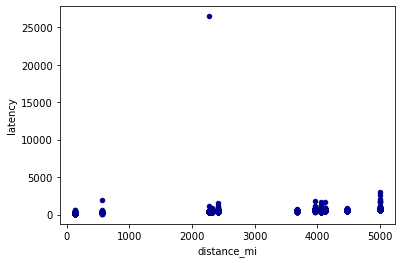

In [14]:
ax1 = df_dist_latency.plot.scatter(x='distance_mi', y='latency', c='DarkBlue')

In [15]:
df_dist_latency.loc[df_dist_latency['latency'] > 10000]

,distance_mi,Response Time (ms),latency
1227,2272,"26,477 ms",26477


In [16]:
df_dist_latency.shape

(10000, 3)

In [17]:
df_dist_latency2 = df_dist_latency.drop(df_dist_latency[df_dist_latency.latency > 10000].index)

In [18]:
df_dist_latency2.shape

(9999, 3)

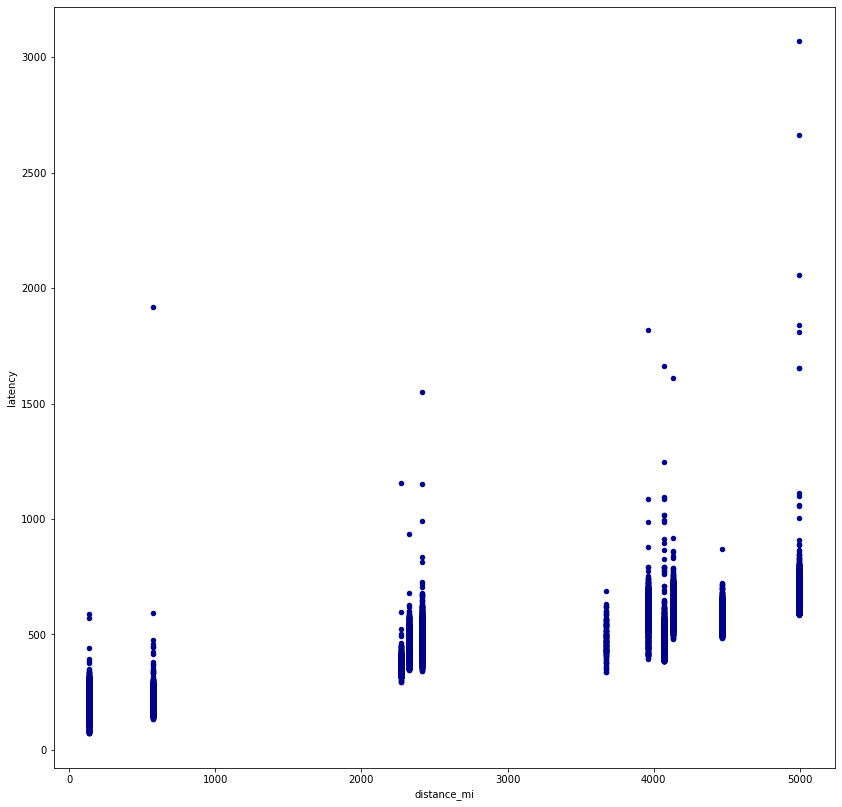

In [19]:
ax2 = df_dist_latency2.plot.scatter(x='distance_mi', y='latency', c='DarkBlue', figsize = (14,14))

In [20]:
df_dist_latency2.latency.min()

72

In [21]:
df_dist_latency2.head()

,distance_mi,Response Time (ms),latency
0,4129,703 ms,703
1,4129,674 ms,674
2,4129,702 ms,702
3,4129,680 ms,680
4,4129,565 ms,565


In [26]:
df_dist_latency2['distance_mi'].min()

137

In [32]:
df_philadelphia = df_dist_latency2[df_dist_latency2['distance_mi'] == 137]

In [33]:
df_philadelphia.head()

,distance_mi,Response Time (ms),latency
2000,137,259 ms,259
2001,137,290 ms,290
2002,137,211 ms,211
2003,137,173 ms,173
2004,137,240 ms,240


In [36]:
df_philadelphia['latency'].quantile(.25)

174.75

In [37]:
df_philadelphia['latency'].quantile(.5)

221.5

In [38]:
df_philadelphia['latency'].quantile(.75)

261.0

In [39]:
df_philadelphia['latency'].quantile(.9)

285.0

In [40]:
df_philadelphia['latency'].quantile(.95)

302.04999999999995

In [41]:
df_philadelphia['latency'].quantile(.99)

335.03

In [42]:
df_philadelphia['latency'].min()

72

In [43]:
df_philadelphia['latency'].max()

589

In [44]:
df_philadelphia['latency'].mean()

216.116

(0.0, 700.0)

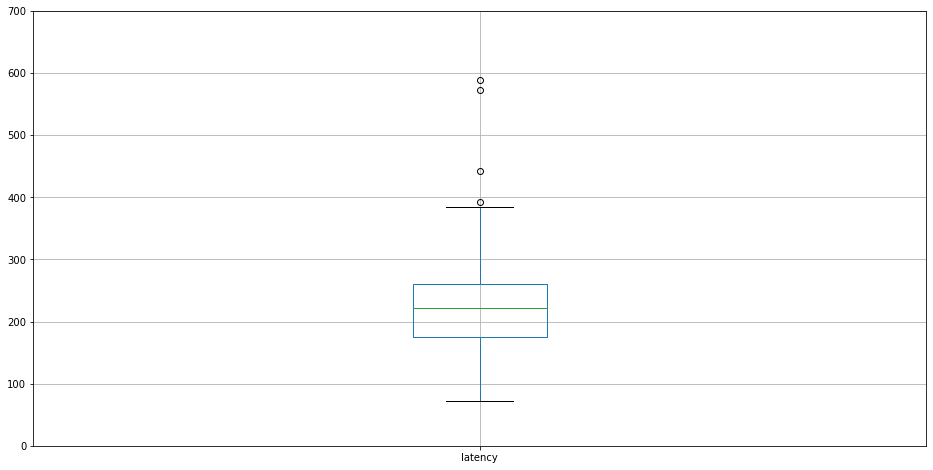

In [51]:
boxplot = df_philadelphia.boxplot(column=['latency'], figsize=(16,8))
plt.ylim(0,700)

In [54]:
df_dist_latency2['distance_mi'].unique()

array([4129, 2272,  137, 2325, 4068, 3961, 4468,  571, 2413, 4997, 3676])

In [55]:
df_loc

,Location,Location_short,lat,lon,distance_mi
0,Stockholm 2 (Sweden),Stockholm,59.334591,18.063240,4129
1,Los Angeles 3 (CA),Los Angeles,34.052235,-118.243683,2272
2,Philadelphia 2 (PA),Philadelphia,39.952583,-75.165222,137
3,Portland 2 (OR),Portland,45.523064,-122.676483,2325
4,Frankfurt 3 (Germany),Frankfurt,50.110924,8.682127,4068
5,Dusseldorf 2 (Germany),Dusseldorf,51.233334,6.783333,3961
6,Warsaw (Poland),Warsaw,52.237049,21.017532,4468
7,Chicago 2 (IL),Chicago,41.881832,-87.623177,571
8,San Francisco 2 (CA),San Francisco,37.773972,-122.431297,2413
9,Thessaloniki (Greece),Thessaloniki,40.629269,22.947412,4997


In [56]:
df_loc.sort_values(by=['distance_mi'])

,Location,Location_short,lat,lon,distance_mi
2,Philadelphia 2 (PA),Philadelphia,39.952583,-75.165222,137
7,Chicago 2 (IL),Chicago,41.881832,-87.623177,571
1,Los Angeles 3 (CA),Los Angeles,34.052235,-118.243683,2272
3,Portland 2 (OR),Portland,45.523064,-122.676483,2325
8,San Francisco 2 (CA),San Francisco,37.773972,-122.431297,2413
10,London 5 (UK),London,51.509865,-0.118092,3676
5,Dusseldorf 2 (Germany),Dusseldorf,51.233334,6.783333,3961
4,Frankfurt 3 (Germany),Frankfurt,50.110924,8.682127,4068
0,Stockholm 2 (Sweden),Stockholm,59.334591,18.063240,4129
6,Warsaw (Poland),Warsaw,52.237049,21.017532,4468


In [57]:
df_chicago = df_dist_latency2[df_dist_latency2['distance_mi'] == 571]

In [58]:
df_chicago.head()

,distance_mi,Response Time (ms),latency
6865,571,259 ms,259
6866,571,232 ms,232
6867,571,163 ms,163
6868,571,270 ms,270
6869,571,196 ms,196


(0.0, 700.0)

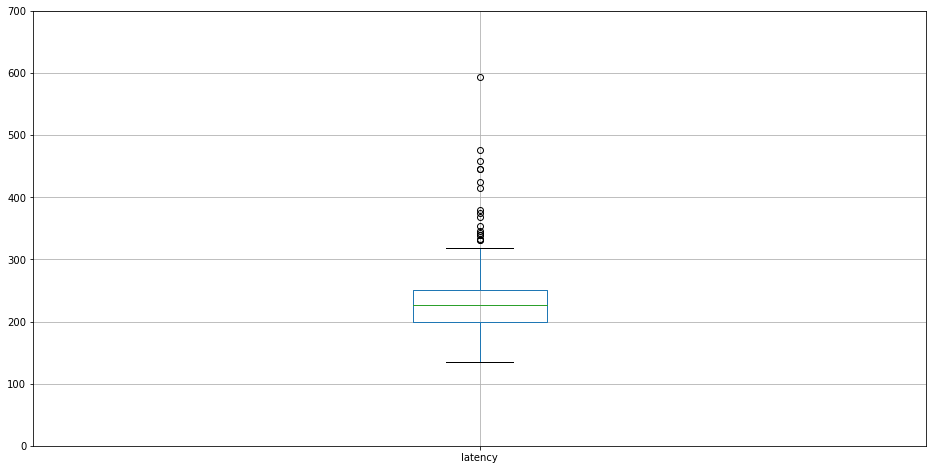

In [59]:
boxplot = df_chicago.boxplot(column=['latency'], figsize=(16,8))
plt.ylim(0,700)

In [60]:
df1 = df_philadelphia.copy()

In [62]:
df1['chicago'] = df_chicago['latency']

(0.0, 700.0)

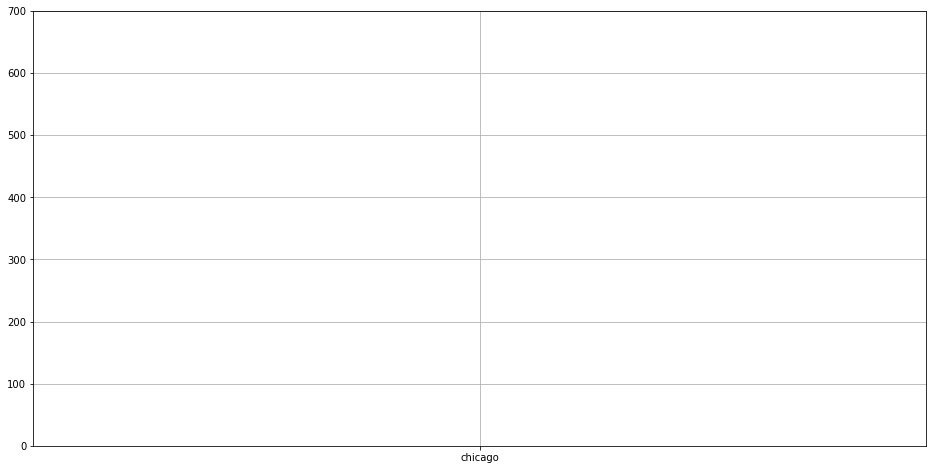

In [63]:
boxplot = df1.boxplot(column=['chicago'], figsize=(16,8))
plt.ylim(0,700)

In [64]:
df1['chicago'].head()

2000   NaN
2001   NaN
2002   NaN
2003   NaN
2004   NaN
Name: chicago, dtype: float64

In [65]:
df1['chicago'].tail()

2995   NaN
2996   NaN
2997   NaN
2998   NaN
2999   NaN
Name: chicago, dtype: float64

In [66]:
df1.head()

,distance_mi,Response Time (ms),latency,chicago
2000,137,259 ms,259,NaN
2001,137,290 ms,290,NaN
2002,137,211 ms,211,NaN
2003,137,173 ms,173,NaN
2004,137,240 ms,240,NaN


In [67]:
df_chicago['latency']

6865    259
6866    232
6867    163
6868    270
6869    196
       ... 
7860    183
7861    270
7862    238
7863    185
7864    236
Name: latency, Length: 1000, dtype: int64

In [69]:
df_philadelphia.shape

(1000, 3)

In [70]:
df_chicago.shape

(1000, 3)

In [71]:
pd.RangeIndex(3)

RangeIndex(start=0, stop=3, step=1)

In [72]:
df1.head()

,distance_mi,Response Time (ms),latency,chicago
2000,137,259 ms,259,NaN
2001,137,290 ms,290,NaN
2002,137,211 ms,211,NaN
2003,137,173 ms,173,NaN
2004,137,240 ms,240,NaN


In [73]:
df1.reindex(pd.RangeIndex(1000))

,distance_mi,Response Time (ms),latency,chicago
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
995,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN


In [74]:
df1.head()

,distance_mi,Response Time (ms),latency,chicago
2000,137,259 ms,259,NaN
2001,137,290 ms,290,NaN
2002,137,211 ms,211,NaN
2003,137,173 ms,173,NaN
2004,137,240 ms,240,NaN


In [76]:
df1.set_index(pd.RangeIndex(1000))

,distance_mi,Response Time (ms),latency,chicago
0,137,259 ms,259,NaN
1,137,290 ms,290,NaN
2,137,211 ms,211,NaN
3,137,173 ms,173,NaN
4,137,240 ms,240,NaN
...,...,...,...,...
995,137,101 ms,101,NaN
996,137,129 ms,129,NaN
997,137,275 ms,275,NaN
998,137,255 ms,255,NaN


In [77]:
df1.head()

,distance_mi,Response Time (ms),latency,chicago
2000,137,259 ms,259,NaN
2001,137,290 ms,290,NaN
2002,137,211 ms,211,NaN
2003,137,173 ms,173,NaN
2004,137,240 ms,240,NaN


In [78]:
df2 = df1.set_index(pd.RangeIndex(1000))

In [79]:
df2.head()

,distance_mi,Response Time (ms),latency,chicago
0,137,259 ms,259,NaN
1,137,290 ms,290,NaN
2,137,211 ms,211,NaN
3,137,173 ms,173,NaN
4,137,240 ms,240,NaN


In [83]:
df2.drop(columns=['chicago'])

,distance_mi,Response Time (ms),latency
0,137,259 ms,259
1,137,290 ms,290
2,137,211 ms,211
3,137,173 ms,173
4,137,240 ms,240
...,...,...,...
995,137,101 ms,101
996,137,129 ms,129
997,137,275 ms,275
998,137,255 ms,255


In [84]:
df3 = df_chicago.set_index(pd.RangeIndex(1000))

In [85]:
df3.head()

,distance_mi,Response Time (ms),latency
0,571,259 ms,259
1,571,232 ms,232
2,571,163 ms,163
3,571,270 ms,270
4,571,196 ms,196


In [86]:
df2['chicago'] = df3['latency']

In [87]:
df2.head()

,distance_mi,Response Time (ms),latency,chicago
0,137,259 ms,259,259
1,137,290 ms,290,232
2,137,211 ms,211,163
3,137,173 ms,173,270
4,137,240 ms,240,196


In [88]:
df2.rename(columns={'latency':'philadelphia'}, inplace=True)

In [89]:
df2.head()

,distance_mi,Response Time (ms),philadelphia,chicago
0,137,259 ms,259,259
1,137,290 ms,290,232
2,137,211 ms,211,163
3,137,173 ms,173,270
4,137,240 ms,240,196


(0.0, 700.0)

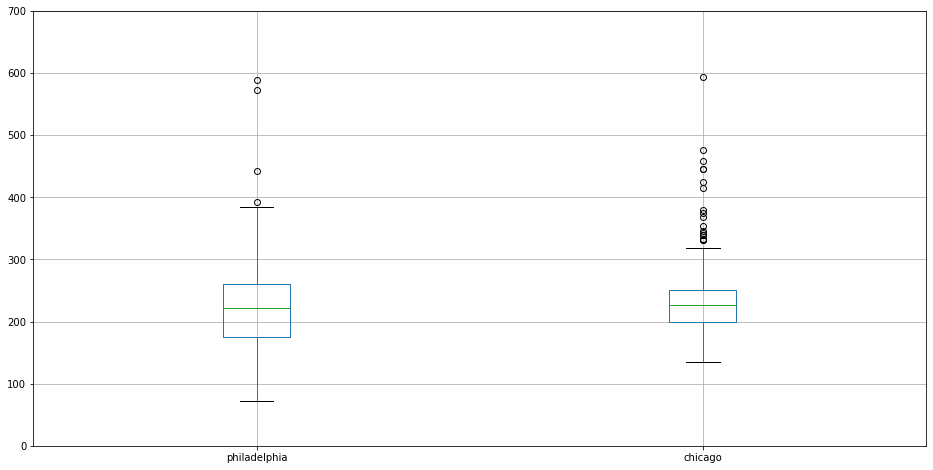

In [91]:
boxplot = df2.boxplot(column=['philadelphia', 'chicago'], figsize=(16,8))
plt.ylim(0,700)

In [92]:
#137
df2.rename(columns={'philadelphia':'Philadelphia (137 miles)'}, inplace=True)

In [96]:
df2.rename(columns={'chicago':'Chicago (571 miles)'}, inplace=True)

(0.0, 700.0)

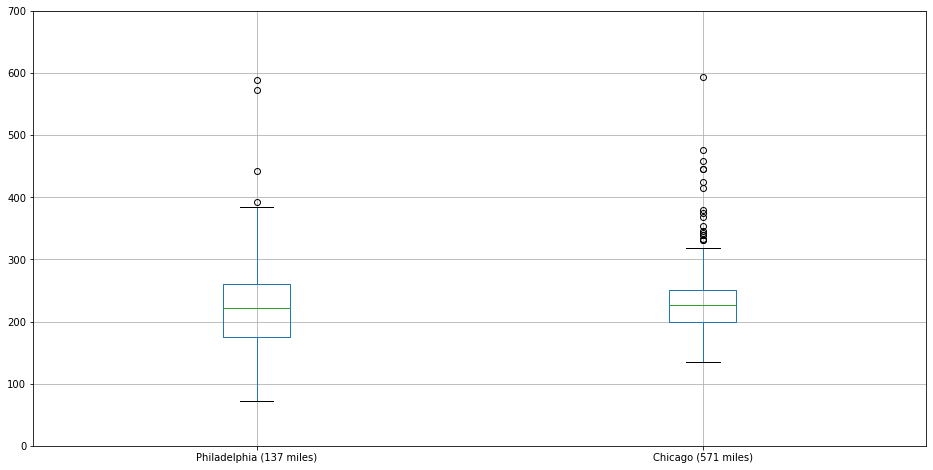

In [98]:
boxplot = df2.boxplot(column=['Philadelphia (137 miles)', 'Chicago (571 miles)'], figsize=(16,8))
plt.ylim(0,700)

In [103]:
df_la = df_dist_latency2[df_dist_latency2['distance_mi'] == 2272].set_index(pd.RangeIndex(999))

In [104]:
df2['Los Angeles (2272 miles)'] = df_la['latency']

(0.0, 700.0)

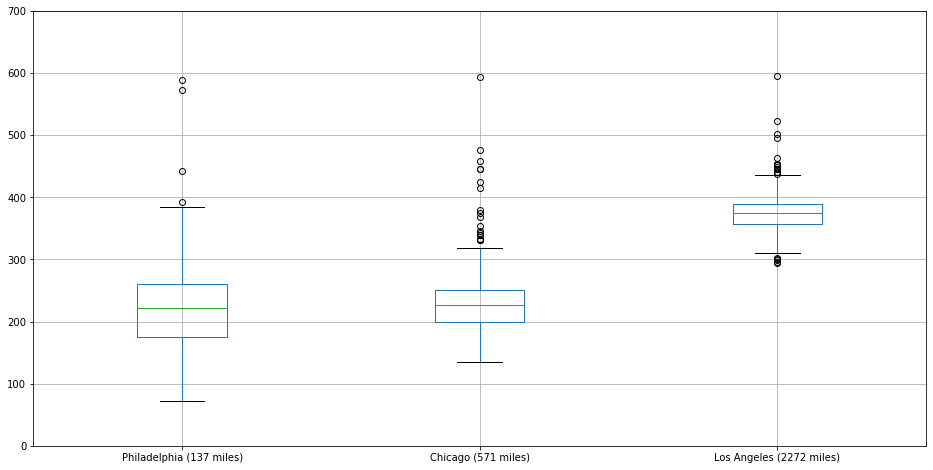

In [105]:
boxplot = df2.boxplot(column=['Philadelphia (137 miles)', 'Chicago (571 miles)', 'Los Angeles (2272 miles)'], figsize=(16,8))
plt.ylim(0,700)

In [99]:
df_loc.sort_values(by=['distance_mi'])

,Location,Location_short,lat,lon,distance_mi
2,Philadelphia 2 (PA),Philadelphia,39.952583,-75.165222,137
7,Chicago 2 (IL),Chicago,41.881832,-87.623177,571
1,Los Angeles 3 (CA),Los Angeles,34.052235,-118.243683,2272
3,Portland 2 (OR),Portland,45.523064,-122.676483,2325
8,San Francisco 2 (CA),San Francisco,37.773972,-122.431297,2413
10,London 5 (UK),London,51.509865,-0.118092,3676
5,Dusseldorf 2 (Germany),Dusseldorf,51.233334,6.783333,3961
4,Frankfurt 3 (Germany),Frankfurt,50.110924,8.682127,4068
0,Stockholm 2 (Sweden),Stockholm,59.334591,18.063240,4129
6,Warsaw (Poland),Warsaw,52.237049,21.017532,4468


In [112]:
df2['Portland (2325 miles)'] = df_dist_latency2[df_dist_latency2['distance_mi'] == 2325].set_index(pd.RangeIndex(1000))['latency']

In [114]:
df2['San Francisco (2413 miles)'] = df_dist_latency2[df_dist_latency2['distance_mi'] == 2413].set_index(pd.RangeIndex(1000))['latency']

In [117]:
df2['London (3676 miles)'] = df_dist_latency2[df_dist_latency2['distance_mi'] == 3676].set_index(pd.RangeIndex(135))['latency']

In [119]:
df2['Dusseldorf (3961 miles)'] = df_dist_latency2[df_dist_latency2['distance_mi'] == 3961].set_index(pd.RangeIndex(1000))['latency']

In [122]:
df2['Frankfurt (4068 miles)'] = df_dist_latency2[df_dist_latency2['distance_mi'] == 4068].set_index(pd.RangeIndex(865))['latency']

In [125]:
df2['Stockholm (4129 miles)'] = df_dist_latency2[df_dist_latency2['distance_mi'] == 4129].set_index(pd.RangeIndex(1000))['latency']

In [127]:
df2['Warsaw (4468 miles)'] = df_dist_latency2[df_dist_latency2['distance_mi'] == 4468].set_index(pd.RangeIndex(1000))['latency']

In [129]:
df2['Thessaloniki (4997 miles)'] = df_dist_latency2[df_dist_latency2['distance_mi'] == 4997].set_index(pd.RangeIndex(1000))['latency']

(0.0, 700.0)

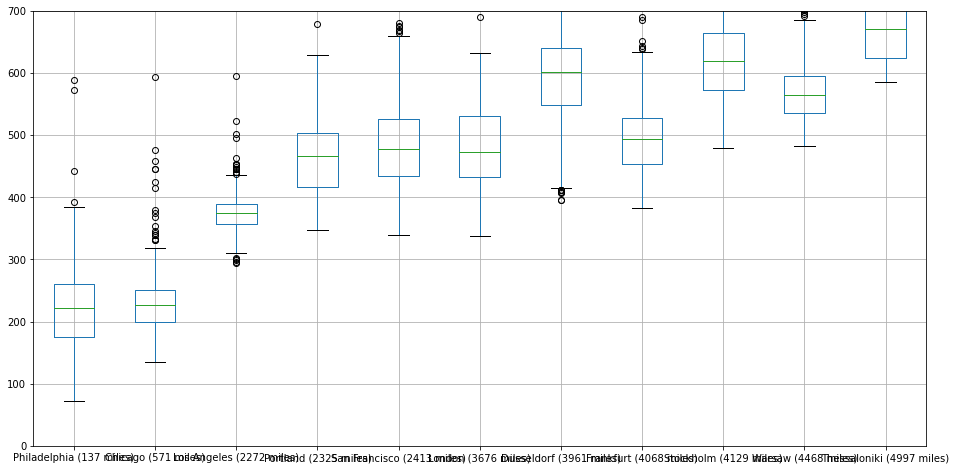

In [130]:
boxplot = df2.boxplot(column=['Philadelphia (137 miles)', 'Chicago (571 miles)', 'Los Angeles (2272 miles)',
                             'Portland (2325 miles)', 'San Francisco (2413 miles)',
                             'London (3676 miles)', 'Dusseldorf (3961 miles)',
                             'Frankfurt (4068 miles)', 'Stockholm (4129 miles)',
                             'Warsaw (4468 miles)', 'Thessaloniki (4997 miles)'], figsize=(16,8))
plt.ylim(0,700)

(0.0, 1000.0)

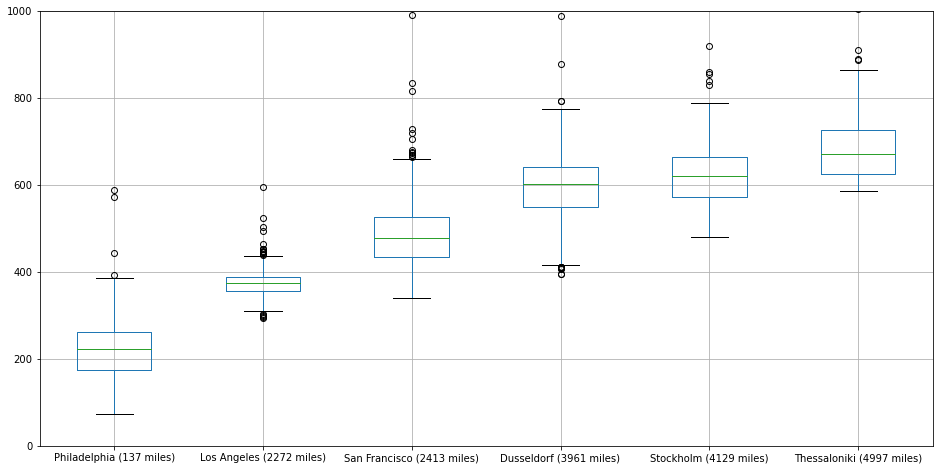

In [136]:
boxplot = df2.boxplot(column=['Philadelphia (137 miles)', 'Los Angeles (2272 miles)',
                              'San Francisco (2413 miles)',
                              'Dusseldorf (3961 miles)',
                              'Stockholm (4129 miles)',
                             'Thessaloniki (4997 miles)'], figsize=(16,8))
plt.ylim(0,1000)

In [138]:
data = {'Philadelphia (137 miles)':[df2['Philadelphia (137 miles)'].min(),
                      df2.quantile(.25)['Philadelphia (137 miles)'], df2.quantile(.5)['Philadelphia (137 miles)'], 
                      df2.quantile(.75)['Philadelphia (137 miles)'], df2.quantile(.9)['Philadelphia (137 miles)'], 
                      df2.quantile(.95)['Philadelphia (137 miles)'], df2.quantile(.96)['Philadelphia (137 miles)'],
                      df2.quantile(.97)['Philadelphia (137 miles)'], df2.quantile(.98)['Philadelphia (137 miles)'], 
                      df2.quantile(.99)['Philadelphia (137 miles)'],
                      df2['Philadelphia (137 miles)'].max(),
                      df2['Philadelphia (137 miles)'].mean()],
        }
index = ['min', 'p25', 'p50', 'p75', 'p90', 'p95', 'p96', 'p97', 'p98', 'p99', 'max', 'mean']
df3 = pd.DataFrame(data, index=index)
df3

,Philadelphia (137 miles)
min,72.000
p25,174.750
p50,221.500
p75,261.000
p90,285.000
p95,302.050
p96,308.080
p97,315.060
p98,320.000
p99,335.030


In [144]:
data={k:[df2[k].min().astype(int), df2.quantile(.25)[k].astype(int), df2.quantile(.5)[k].astype(int), 
         df2.quantile(.75)[k].astype(int), 
         df2.quantile(.9)[k].astype(int), df2.quantile(.95)[k].astype(int), df2.quantile(.96)[k].astype(int), 
         df2.quantile(.97)[k].astype(int), df2.quantile(.98)[k].astype(int), df2.quantile(.99)[k].astype(int),
         df2[k].max().astype(int), df2[k].mean().astype(int)]
 for k in 
 ['Philadelphia (137 miles)', 
  'Los Angeles (2272 miles)',
  'San Francisco (2413 miles)',
  'Dusseldorf (3961 miles)',
  'Stockholm (4129 miles)',
  'Thessaloniki (4997 miles)']}
index = ['min', 'p25', 'p50', 'p75', 'p90', 'p95', 'p96', 'p97', 'p98', 'p99', 'max', 'mean']
df3 = pd.DataFrame(data, index=index)
df3

,Philadelphia (137 miles),Los Angeles (2272 miles),San Francisco (2413 miles),Dusseldorf (3961 miles),Stockholm (4129 miles),Thessaloniki (4997 miles)
min,72,294,340,395,480,586
p25,174,357,435,549,572,625
p50,221,374,478,601,620,671
p75,261,389,526,640,665,727
p90,285,405,566,672,704,768
p95,302,418,593,695,724,790
p96,308,419,603,701,728,799
p97,315,422,616,705,731,808
p98,320,434,627,720,745,832
p99,335,446,674,739,768,1058


In [149]:
df3.transpose()

,min,p25,p50,p75,p90,p95,p96,p97,p98,p99,max,mean
Philadelphia (137 miles),72,174,221,261,285,302,308,315,320,335,589,216
Los Angeles (2272 miles),294,357,374,389,405,418,419,422,434,446,1156,373
San Francisco (2413 miles),340,435,478,526,566,593,603,616,627,674,1548,484
Dusseldorf (3961 miles),395,549,601,640,672,695,701,705,720,739,1820,594
Stockholm (4129 miles),480,572,620,665,704,724,728,731,745,768,1611,622
Thessaloniki (4997 miles),586,625,671,727,768,790,799,808,832,1058,3068,690
